In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# 1. Load the dataset
file_path = '/content/Loan.csv'  # Update with the correct path if needed
df = pd.read_csv(file_path)

# Display the first few rows
print("First 5 rows of the dataset:")
print(df.head())

First 5 rows of the dataset:
  ApplicationDate  Age  AnnualIncome  CreditScore EmploymentStatus  \
0      2018-01-01   45         39948          617         Employed   
1      2018-01-02   38         39709          628         Employed   
2      2018-01-03   47         40724          570         Employed   
3      2018-01-04   58         69084          545         Employed   
4      2018-01-05   37        103264          594         Employed   

  EducationLevel  Experience  LoanAmount  LoanDuration MaritalStatus  ...  \
0         Master          22       13152            48       Married  ...   
1      Associate          15       26045            48        Single  ...   
2       Bachelor          26       17627            36       Married  ...   
3    High School          34       37898            96        Single  ...   
4      Associate          17        9184            36       Married  ...   

   MonthlyIncome UtilityBillsPaymentHistory  JobTenure  NetWorth  \
0    3329.000000   

In [ ]:
# 2. Data Cleaning
# Remove duplicate rows if any
df.drop_duplicates(inplace=True)

# Strip leading/trailing whitespaces from column names
df.columns = df.columns.str.strip()

# Check the data types of each column
print("\nData Types:")
print(df.dtypes)


Data Types:
ApplicationDate                object
Age                             int64
AnnualIncome                    int64
CreditScore                     int64
EmploymentStatus               object
EducationLevel                 object
Experience                      int64
LoanAmount                      int64
LoanDuration                    int64
MaritalStatus                  object
NumberOfDependents              int64
HomeOwnershipStatus            object
MonthlyDebtPayments             int64
CreditCardUtilizationRate     float64
NumberOfOpenCreditLines         int64
NumberOfCreditInquiries         int64
DebtToIncomeRatio             float64
BankruptcyHistory               int64
LoanPurpose                    object
PreviousLoanDefaults            int64
PaymentHistory                  int64
LengthOfCreditHistory           int64
SavingsAccountBalance           int64
CheckingAccountBalance          int64
TotalAssets                     int64
TotalLiabilities                int64


Missing Data:
ApplicationDate               0
Age                           0
AnnualIncome                  0
CreditScore                   0
EmploymentStatus              0
EducationLevel                0
Experience                    0
LoanAmount                    0
LoanDuration                  0
MaritalStatus                 0
NumberOfDependents            0
HomeOwnershipStatus           0
MonthlyDebtPayments           0
CreditCardUtilizationRate     0
NumberOfOpenCreditLines       0
NumberOfCreditInquiries       0
DebtToIncomeRatio             0
BankruptcyHistory             0
LoanPurpose                   0
PreviousLoanDefaults          0
PaymentHistory                0
LengthOfCreditHistory         0
SavingsAccountBalance         0
CheckingAccountBalance        0
TotalAssets                   0
TotalLiabilities              0
MonthlyIncome                 0
UtilityBillsPaymentHistory    0
JobTenure                     0
NetWorth                      0
BaseInterestRate         

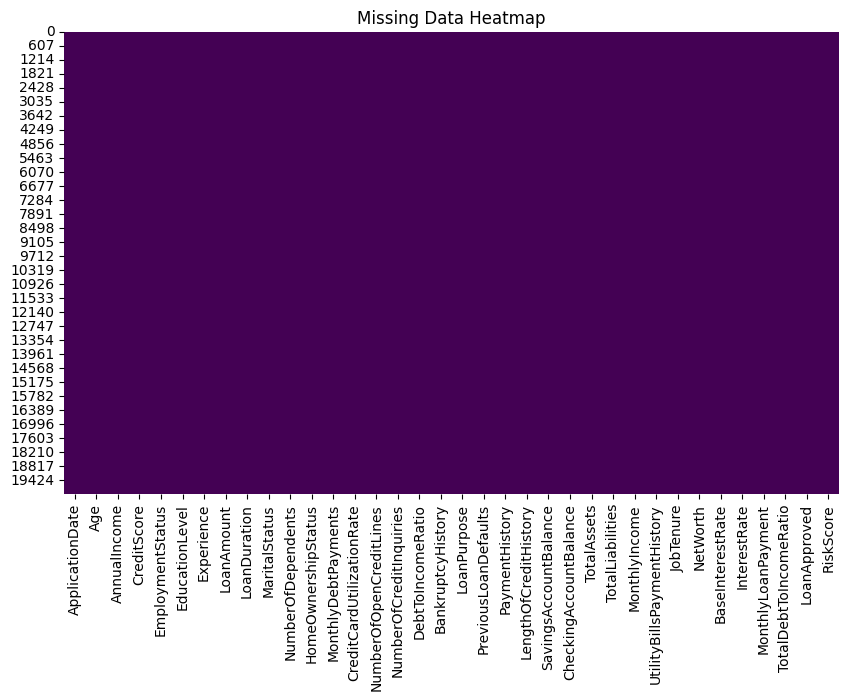

In [ ]:
# 3. Check for Missing Data
print("\nMissing Data:")
print(df.isnull().sum())

# Visualize missing data using a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data Heatmap')
plt.show()

# Optionally, fill or drop missing values
df.dropna(inplace=True)  # Drop rows with missing values


In [ ]:
# 4. Removing Outliers
# Let's use the IQR method for numerical columns to detect and remove outliers

def remove_outliers_iqr(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

# Identify numerical columns
numerical_cols = df.select_dtypes(include=['number']).columns

# Remove outliers
df = remove_outliers_iqr(df, numerical_cols)

print("\nData after removing outliers:")
print(df.describe())



Data after removing outliers:
               Age   AnnualIncome  CreditScore   Experience    LoanAmount  \
count  6631.000000    6631.000000  6631.000000  6631.000000   6631.000000   
mean     38.906801   45560.983260   571.423013    16.675916  23266.152315   
std      11.466262   20753.024717    46.853780    11.109876   9702.510714   
min      18.000000   15000.000000   438.000000     0.000000   4571.000000   
25%      30.000000   29908.500000   541.000000     8.000000  15992.500000   
50%      39.000000   41674.000000   577.000000    16.000000  21787.000000   
75%      47.000000   56922.000000   606.000000    24.000000  29315.000000   
max      72.000000  134276.000000   695.000000    49.000000  53689.000000   

       LoanDuration  NumberOfDependents  MonthlyDebtPayments  \
count   6631.000000         6631.000000          6631.000000   
mean      57.310813            1.521339           427.023375   
std       23.892515            1.376967           186.944948   
min       12.000000

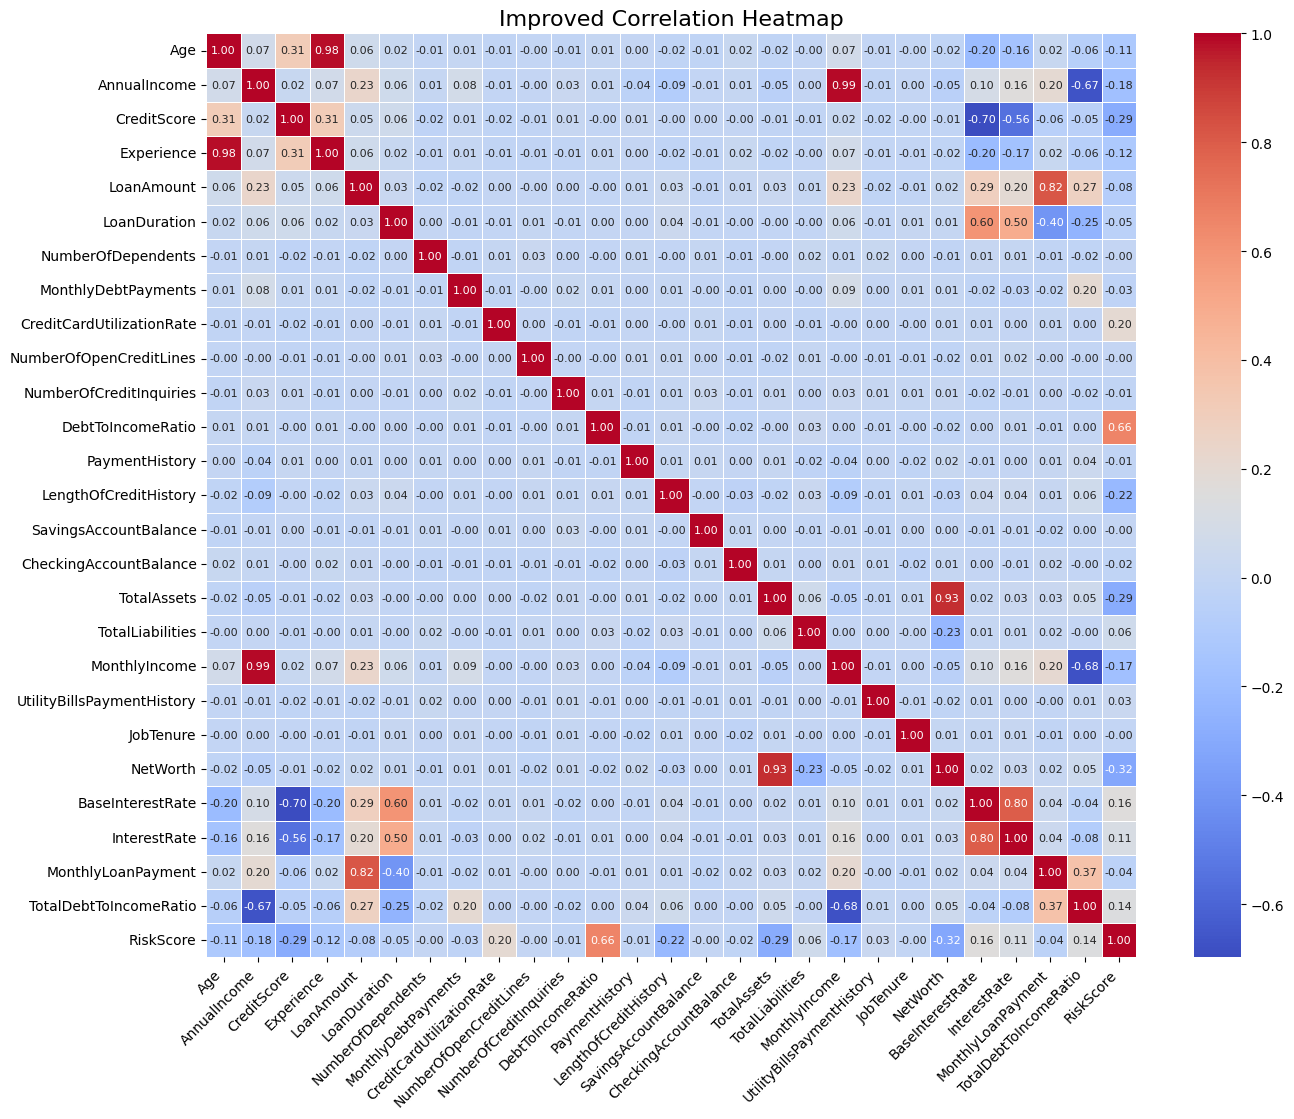

In [ ]:
# Compute the correlation matrix
numerical_df = df.select_dtypes(include=['number'])  # Create numerical_df here
correlation_matrix = numerical_df.corr()

# Drop rows and columns with NaN values in the correlation matrix
correlation_matrix = correlation_matrix.dropna(axis=0, how='all').dropna(axis=1, how='all')

# Plot the heatmap
plt.figure(figsize=(15, 12))
sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap='coolwarm',
    linewidths=0.5,
    fmt=".2f",
    annot_kws={"size": 8}
)

# Rotate x and y-axis labels for better readability
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.title('Improved Correlation Heatmap', fontsize=16)

plt.show()

In [ ]:
import pandas as pd
import numpy as np

# Assuming df is the DataFrame containing 'Age' and 'Experience'

# 1. Create a function to bin Age and Experience into Career Stages
def bin_age_experience(df):
    conditions = [
        (df['Age'] < 30) & (df['Experience'] < 5),  # Early Career
        (df['Age'] >= 30) & (df['Age'] <= 45) & (df['Experience'] >= 5) & (df['Experience'] <= 15),  # Mid Career
        (df['Age'] > 45) & (df['Experience'] > 15)  # Late Career
    ]
    labels = ['Early Career', 'Mid Career', 'Late Career']

    df['CareerStage'] = np.select(conditions, labels, default='Other')
    return df

# Example DataFrame
# df = pd.read_csv('your_data.csv')  # Load your data here

# Apply the binning function
df_binned = bin_age_experience(df)

# View the resulting DataFrame with the new CareerStage variable
print(df_binned[['Age', 'Experience', 'CareerStage']].head())

    Age  Experience  CareerStage
1    38          15   Mid Career
3    58          34  Late Career
6    58          39  Late Career
12   42          21        Other
16   27           7        Other


<ipython-input-9-e4f9e379db52>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='AgeGroup', data=df, palette='Set1')
<ipython-input-9-e4f9e379db52>:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='ExperienceGroup', data=df, palette='Set2')
<ipython-input-9-e4f9e379db52>:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='CareerStage', data=df, palette='Set3')


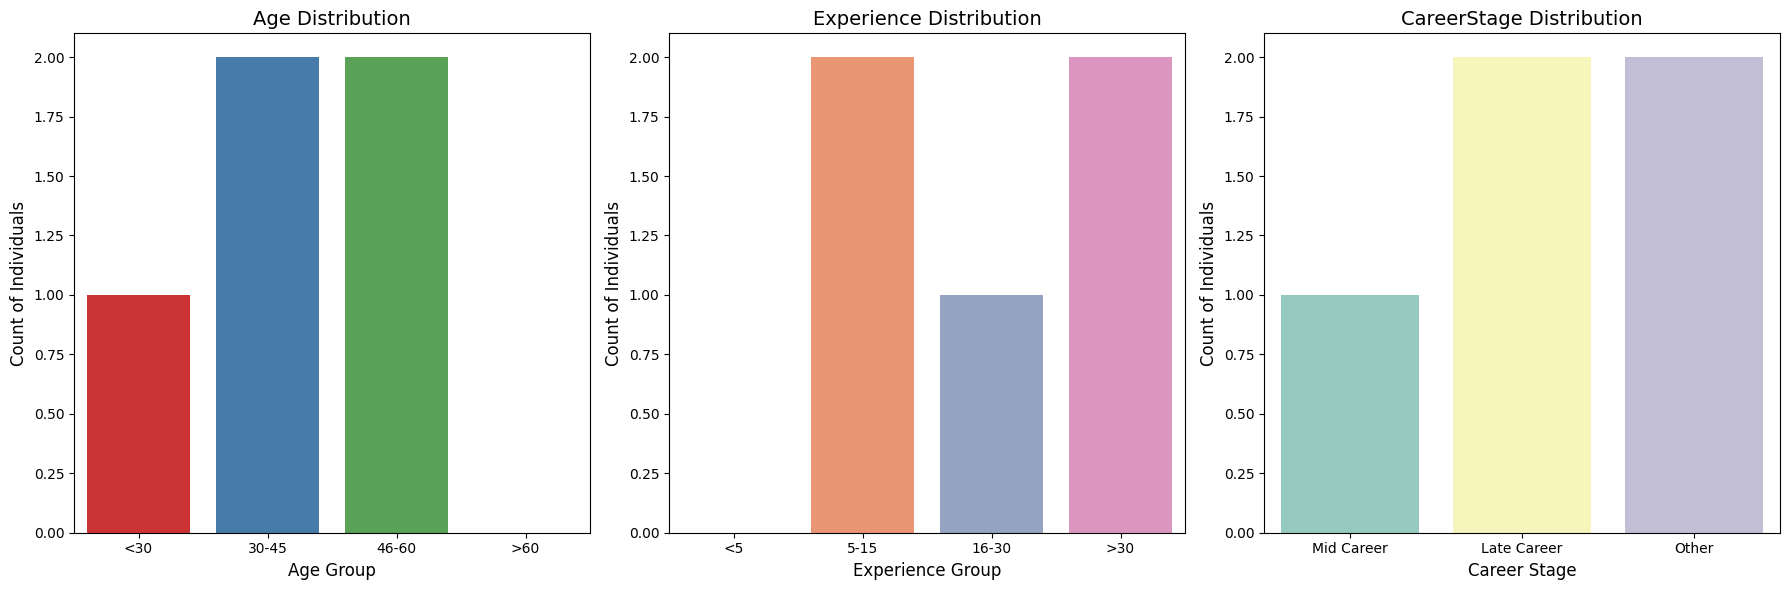

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sample data (based on your example)
data = {
    'Age': [38, 58, 58, 42, 27],
    'Experience': [15, 34, 39, 21, 7],
    'CareerStage': ['Mid Career', 'Late Career', 'Late Career', 'Other', 'Other']
}

# Create DataFrame
df = pd.DataFrame(data)

# 1. Bin Age and Experience into categories
age_bins = [0, 30, 45, 60, 100]
experience_bins = [0, 5, 15, 30, 50]

df['AgeGroup'] = pd.cut(df['Age'], bins=age_bins, labels=['<30', '30-45', '46-60', '>60'])
df['ExperienceGroup'] = pd.cut(df['Experience'], bins=experience_bins, labels=['<5', '5-15', '16-30', '>30'])

# Create a figure for 3 subplots
plt.figure(figsize=(18, 6))

# 2. Bar Graph for Age Distribution
plt.subplot(1, 3, 1)  # First subplot
sns.countplot(x='AgeGroup', data=df, palette='Set1')
plt.title('Age Distribution', fontsize=14)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Count of Individuals', fontsize=12)

# 3. Bar Graph for Experience Distribution
plt.subplot(1, 3, 2)  # Second subplot
sns.countplot(x='ExperienceGroup', data=df, palette='Set2')
plt.title('Experience Distribution', fontsize=14)
plt.xlabel('Experience Group', fontsize=12)
plt.ylabel('Count of Individuals', fontsize=12)

# 4. Bar Graph for CareerStage Distribution
plt.subplot(1, 3, 3)  # Third subplot
sns.countplot(x='CareerStage', data=df, palette='Set3')
plt.title('CareerStage Distribution', fontsize=14)
plt.xlabel('Career Stage', fontsize=12)
plt.ylabel('Count of Individuals', fontsize=12)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

In [ ]:
# Example dataset

df = pd.read_csv(file_path)
# Binning RiskScore
df['RiskCategory'] = df['RiskScore'].apply(lambda x: 'Low Risk' if x < 50 else 'High Risk')
df['RiskBinary'] = df['RiskScore'].apply(lambda x: 0 if x < 50 else 1)

# Display the DataFrame
print(df)

      ApplicationDate  Age  AnnualIncome  CreditScore EmploymentStatus  \
0          2018-01-01   45         39948          617         Employed   
1          2018-01-02   38         39709          628         Employed   
2          2018-01-03   47         40724          570         Employed   
3          2018-01-04   58         69084          545         Employed   
4          2018-01-05   37        103264          594         Employed   
...               ...  ...           ...          ...              ...   
19995      2072-09-29   44         30180          587         Employed   
19996      2072-09-30   56         49246          567         Employed   
19997      2072-10-01   44         48958          645         Employed   
19998      2072-10-02   60         41025          560         Employed   
19999      2072-10-03   20         53227          574         Employed   

      EducationLevel  Experience  LoanAmount  LoanDuration MaritalStatus  ...  \
0             Master          

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

# Load the dataset
file_path = '/content/Loan.csv'  # Update this path to the actual location of the file
df = pd.read_csv(file_path)

df['RiskBinary'] = df['RiskScore'].apply(lambda x: 0 if x < 50 else 1)

# Define features (X) and target (y)
# Update the column names based on your Loan.csv dataset
y = df['RiskBinary']  # Replace with the correct column name for the target variable
X = df[['DebtToIncomeRatio', 'LoanAmount', 'CreditScore',
        'MonthlyDebtPayments', 'AnnualIncome', 'NetWorth']]

# One-hot encode categorical variables in X
X = pd.get_dummies(X, drop_first=True)

# Add a constant to the predictor variables
X = sm.add_constant(X)



# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fit the logistic regression model using statsmodels
logit_model = sm.Logit(y_train, X_train).fit()

# Print the model summary
print(logit_model.summary2())  # Use summary2 for a detailed summary

# Access specific statistics if needed
log_likelihood = logit_model.llf
coefficients = logit_model.params
p_values = logit_model.pvalues

print("\nLog-Likelihood:", log_likelihood)
print("\nCoefficients:\n", coefficients)
print("\nP-Values:\n", p_values)

Optimization terminated successfully.
         Current function value: 0.405606
         Iterations 7
                           Results: Logit
Model:               Logit             Method:            MLE       
Dependent Variable:  RiskBinary        Pseudo R-squared:  0.383     
Date:                2024-12-23 16:18  AIC:               11370.9639
No. Observations:    14000             BIC:               11423.7916
Df Model:            6                 Log-Likelihood:    -5678.5   
Df Residuals:        13993             LL-Null:           -9207.1   
Converged:           1.0000            LLR p-value:       0.0000    
No. Iterations:      7.0000            Scale:             1.0000    
--------------------------------------------------------------------
                     Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
--------------------------------------------------------------------
const                8.8873   0.3131  28.3860 0.0000  8.2736  9.5009
DebtToIncomeRatio    5.0888 

In [ ]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Load the dataset
file_path = '/content/Loan.csv'  # Update this path to the actual location of the file
df = pd.read_csv(file_path)

# Select relevant columns for VIF calculation
columns_of_interest = ['DebtToIncomeRatio', 'LoanAmount', 'MonthlyDebtPayments', 'AnnualIncome', 'NetWorth', 'CreditScore']  # Removed 'CreditScore'
vif_data = df[columns_of_interest]

# Calculate VIF for each feature
vif_values = pd.DataFrame()
vif_values["Feature"] = vif_data.columns
vif_values["VIF"] = [variance_inflation_factor(vif_data.values, i) for i in range(vif_data.shape[1])]

# Print the VIF values
print(vif_values)

               Feature        VIF
0    DebtToIncomeRatio   4.084739
1           LoanAmount   4.313286
2  MonthlyDebtPayments   4.472467
3         AnnualIncome   3.182111
4             NetWorth   1.372365
5          CreditScore  12.760505


In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

# Load the dataset
file_path = '/content/Loan.csv'  # Update this path to the actual location of the file
df = pd.read_csv(file_path)

# Convert RiskScore to a binary target variable
df['RiskBinary'] = df['RiskScore'].apply(lambda x: 0 if x < 50 else 1)

# Define features (X) and target (y)
y = df['RiskBinary']  # Target variable
X = df[['DebtToIncomeRatio', 'LoanAmount',
        'MonthlyDebtPayments', 'AnnualIncome', 'NetWorth']]  # Dropped 'CreditScore'

# One-hot encode categorical variables in X
X = pd.get_dummies(X, drop_first=True)

# Add a constant to the predictor variables
X = sm.add_constant(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fit the logistic regression model using statsmodels
logit_model = sm.Logit(y_train, X_train).fit()

# Print the model summary
print(logit_model.summary2())  # Use summary2 for a detailed summary

# Access specific statistics if needed
log_likelihood = logit_model.llf
coefficients = logit_model.params
p_values = logit_model.pvalues

print("\nLog-Likelihood:", log_likelihood)
print("\nCoefficients:\n", coefficients)
print("\nP-Values:\n", p_values)


Optimization terminated successfully.
         Current function value: 0.432222
         Iterations 7
                           Results: Logit
Model:               Logit             Method:            MLE       
Dependent Variable:  RiskBinary        Pseudo R-squared:  0.343     
Date:                2024-12-23 16:37  AIC:               12114.2231
No. Observations:    14000             BIC:               12159.5040
Df Model:            5                 Log-Likelihood:    -6051.1   
Df Residuals:        13994             LL-Null:           -9207.1   
Converged:           1.0000            LLR p-value:       0.0000    
No. Iterations:      7.0000            Scale:             1.0000    
--------------------------------------------------------------------
                     Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
--------------------------------------------------------------------
const                1.3214   0.0851  15.5365 0.0000  1.1547  1.4881
DebtToIncomeRatio    4.7058 

Confusion Matrix:
[[1470  850]
 [ 355 3325]]
Accuracy: 0.7991666666666667
Precision: 0.7964071856287425
Recall: 0.9035326086956522
F1-Score: 0.8465945257797581


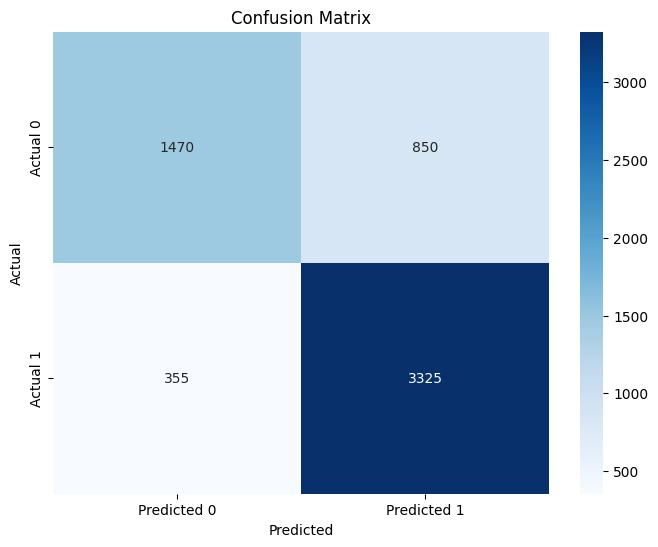

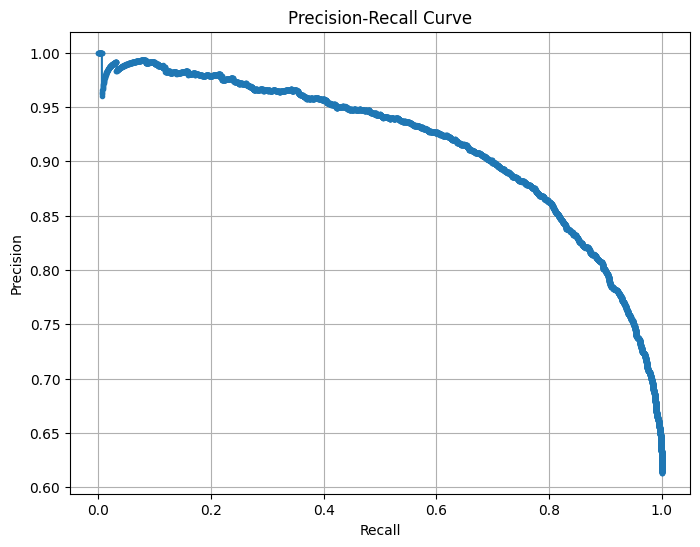

In [3]:
# prompt: confusion matrix with accuracy and precall graph also

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

# ... (Your existing code) ...

# Assuming 'logit_model', 'X_test', and 'y_test' are defined as in your previous code

# Make predictions on the test set
y_pred = logit_model.predict(X_test)
y_pred_class = (y_pred > 0.5).astype(int) # Convert probabilities to class labels


# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_class)
print("Confusion Matrix:")
print(cm)

# Accuracy
accuracy = accuracy_score(y_test, y_pred_class)
print(f"Accuracy: {accuracy}")

# Precision
precision = precision_score(y_test, y_pred_class)
print(f"Precision: {precision}")

# Recall
recall = recall_score(y_test, y_pred_class)
print(f"Recall: {recall}")

#F1-Score
f1 = f1_score(y_test, y_pred_class)
print(f"F1-Score: {f1}")


# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


# Precision-Recall Curve
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)

plt.figure(figsize=(8,6))
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.grid()
plt.show()

In [4]:
# prompt: odds ratio

# Assuming 'logit_model' and 'X_test' are defined as in your previous code.
import numpy as np

# Get the predicted probabilities
y_pred_prob = logit_model.predict(X_test)

# Odds ratio calculation
odds_ratios = np.exp(logit_model.params)  # Exponentiate the coefficients

# Print the odds ratios
print("Odds Ratios:")
odds_ratios

Odds Ratios:


,0
const,3.748634
DebtToIncomeRatio,110.589391
LoanAmount,1.000037
MonthlyDebtPayments,1.000491
AnnualIncome,0.999958
NetWorth,0.999990
